# Smalls

## Task
https://smalls.notion.site/Marketing-Analyst-Technical-Challenge-Discussion-65e5d85a71224e2fb9d406f4e772ba37

## Position
https://angel.co/company/smalls/jobs/941112-data-analyst

## Questions
1. What major customer segments do you see? How are these segments different? 
2. Which segments are most valuable? 
3. What recommendations for segment-based initiatives do you have based on your analysis? 
4. What data do you wish you had received to make a more informed recommendation?

## Segmentation based on activity

There are two groups of users - ACTIVE and INACTIVE (cancelled)

- Out of INACTIVE there are users WITH and WITHOUT orders (were on subscribsion but decided to quit)
- Same for ACTIVE users - there is segment of users that bring money (have orders) and users that are on trial (no orders, negative margin)

This four groups have different business value and need different (marketing) treatment: 
- activation for users on Trial
    - education about the company
    - education about other products and services
    - education what is expected from user how to continue with the subscription
- reactivation (depend on cancellation reason)
    - if there is new product or formula (e.g. with different taste, if reason was taste)
- cross-sell
    - new products, new partnersips
- up-sell
    - other products that can be of interest
- support:
    - educational materials of pet health, insurance, vets
    - news about the company
    - etc.
- reaction on cancellation - strategy depends on the reason
    - what actions to take when payment details are wrong/not working
    

## Convertion and retention analysis
The biggest effort is needed in convertion from Trial and retention of new clients:
- average convertion rate after trial is 45% (-> another 55% of clients is lost)
- the biggest loss of clients happens after first order (retention 44% -> another 56% of clients is lost)

If combined with cancellation reasons analysis may help to identify key areas for improvement



### Observations:
- most of users are INACTIVE
- most have one or two cats
- most of the reasons to cancel are related to "not eating"
    - food taste, smell, texture may need to be adjusted
- Some reasons look of same type and can be joined for further analysis:
    - Taste: My cat won't eat; Cats won't eat ; Cats Stopped Eating
    - Price: Price, Pricing - don't see value
    - Dead pet: My cat is no longer here
- there is cancellation due to wrong payment data
- for users that had subscription and cancelled the most popular reason may need to be identified ("Others")
- The most common order periods are 4,3 and 2 weeks
- most of the clients quit after 4 orders

**NB.** Last month of data is not complete and in some parts of analysis needs to be excluded.

## Questions
- Why some orders have negative margin? What is the reason: shipping costs, production costs, discounts (campaigns), cost of aquisition? 
- There are users with big negative margin (example in "top 10 least profitable clients"). What is the reason to keep such clients and not prevent such cases early?
- Some cancellation reasons are not clear: CWE - Abandon Trial, CWE - Made Effort
- What is the cancellation reason if there was only Trial? Do customers when signing for trial are simulataniously signing for subscription (if not cancelled during trial then deliver first order? get payment)???
- How company works with cancellation reasons:
    - Is there a workaround to send customer trial of another food type if reason for cancellation is related to "not eating"
    - Does the company send a letter of condolence if the reason for the cancellation is related to the death of cats?
- Can same user get a trial of another product? How it will be reflected in the data
- How company deals with fraudsters?
    - Cases when user changes identity: like same address different but id
- There is a duplicate in CUSTOMERS table (Customer_ID is not unique). Is it only a test case or data storage allows not unique ID?

## Extra data to enrich dataset
- Geography data: 
    - different peformance can be in different cities, states. 
    - Margin analysis is also related to the cost of delivery
- For financial results: Cost of aquisition per channel
- What is in the basket per each order (may it vary on quantity and products)?
- How the communication with clients is organized?

In [1]:
# hide code
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()">
  <input type="submit" id="toggleButton" value="Show Code">
</form>
''')

## Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

path=r'C:\a_job\2022\smalls (cat food)\task'

import sys
sys.path.append(path)

import imp
util = imp.load_source('date_time', r'C:\a_job\2022\smalls (cat food)\date_time.py')

import date_time

df_o=pd.read_excel(f"{path}\data\Analyst Exercise - FACT_ORDERS.xlsx")
df_c=pd.read_excel(f"{path}\data\Analyst Exercise - DIM_CUSTOMERS.xlsx")

print(f"Data contains \nCustomer rows: {df_c.shape[0]} \nOrder rows: {df_o.shape[0]}")

Data contains 
Customer rows: 72717 
Order rows: 209217


In [3]:
#sample customers
df_c.head()

,CUSTOMER_ID,TRIAL_WEEK,TRIAL_PLAN,GA_SOURCE,GA_MEDIUM,CANCELLATION_FLAG,CANCELLATION_DATE,CANCELLATION_REASON,CAT_COUNT
0,5872104079459,2022-05-02,FRESH,bing,cpc,ACTIVE,NaT,NaN,2.0
1,5874517835875,2022-05-02,FRESH,google,cpc,ACTIVE,NaT,NaN,1.0
2,5872455876707,2022-05-02,FRESH,affiliate,impact,ACTIVE,NaT,NaN,1.0
3,5873427906659,2022-05-02,FRESH,affiliate,impact,ACTIVE,NaT,NaN,1.0
4,5872437854307,2022-05-02,FRESH,tapjoy,49bf5cbe33fdb91cd324f6102c726b4a9d1235b41c9df7...,ACTIVE,NaT,NaN,2.0


In [4]:
#sample orders
df_o.head()

,ORDER_ID,CUSTOMER_ID,ORDER_DATE,ORDER_SEQUENCE,ORDER_TYPE,REVENUE,MARGIN
0,3911587332195,5144374181987,2021-02-19 17:52:00,1.0,TRIAL,36.11,-12.57
1,2173509337187,2910017290339,2020-03-27 04:41:07,3.0,SUBSCRIPTION,126.00,69.60
2,3843079929955,5196139036771,2021-05-25 06:11:32,1.0,TRIAL,33.75,-2.48
3,3865901662307,5177666568291,2021-06-04 03:18:29,2.0,SUBSCRIPTION,162.00,-79.63
4,3939062480995,5304357388387,2021-07-07 23:16:40,1.0,TRIAL,33.75,-51.84


## Preparation

In [5]:
#---
cid='CUSTOMER_ID'
oid='ORDER_ID'

# ---
c_cat_features=['TRIAL_PLAN', 'GA_SOURCE', 'GA_MEDIUM',
       'CANCELLATION_FLAG','CANCELLATION_REASON',
       'CAT_COUNT']
c_date_features=['TRIAL_WEEK','CANCELLATION_DATE']

# trial week - a date that starts with monday

# ---
o_cat_features=['ORDER_TYPE', 'ORDER_SEQUENCE']
o_date_features=['ORDER_DATE']
o_date_features=['ORDER_SEQUENCE', 'REVENUE', 'MARGIN']

In [6]:
#check if unique in customers
if len(df_c['CUSTOMER_ID'].unique().tolist())==df_c.shape[0]:
    print("no problem")
else:
    tmp=df_c.groupby(['CUSTOMER_ID']).size().reset_index().copy()
    tmp.rename(columns={0:"count"}, inplace =True)  
    duplicate_id=tmp.loc[tmp["count"]>1]['CUSTOMER_ID'].tolist()
    print("Duplicates in Customer", duplicate_id)
    
    print(df_c.loc[df_c['CUSTOMER_ID'].isin(duplicate_id)])
    
    #Remove duplicates
    df_c=df_c.loc[~(df_c['CUSTOMER_ID'].isin(duplicate_id))].copy()
    df_o=df_o.loc[~(df_o['CUSTOMER_ID'].isin(duplicate_id))].copy()

Duplicates in Customer [5359139848291]
         CUSTOMER_ID TRIAL_WEEK TRIAL_PLAN GA_SOURCE GA_MEDIUM  \
35982  5359139848291 2021-08-02      FRESH       NaN       NaN   
36089  5359139848291 2021-08-02      FRESH       NaN       NaN   

      CANCELLATION_FLAG   CANCELLATION_DATE CANCELLATION_REASON  CAT_COUNT  
35982          INACTIVE 2021-08-31 12:53:17               Other        1.0  
36089          INACTIVE 2021-08-05 09:25:37               Other        1.0  


In [7]:
#check if unique in orders
if len(df_o['ORDER_ID'].unique().tolist())==df_o.shape[0]:
    print("no problem")
else:
    tmp=df_o.groupby(['ORDER_ID']).size().reset_index().copy()
    tmp.rename(columns={0:"count"}, inplace =True)  
    duplicate_id=tmp.loc[tmp["count"]>1]['ORDER_ID'].tolist()
    print("Duplicates in ORDERS", duplicate_id)
    
    print(df_o.loc[df_o['ORDER_ID'].isin(duplicate_id)])
    
    #Remove duplicates
    df_o=df_o.loc[~(df_o['ORDER_ID'].isin(duplicate_id))].copy()

no problem


In [8]:
# convert dates
df_o=date_time.date_parsing(df_o,'ORDER_DATE')
df_c=date_time.date_parsing(df_c,'TRIAL_WEEK')
df_c=date_time.date_parsing(df_c,'CANCELLATION_DATE')
# some columns are int not float
df_o['ORDER_SEQUENCE']=df_o['ORDER_SEQUENCE'].astype('Int64')

#fillna
for c in ['GA_SOURCE', 'GA_MEDIUM','CANCELLATION_REASON']:
    df_c[c].fillna('No_data', inplace=True)

In [9]:
tmp=pd.merge(df_o,df_c, on=cid, how='left')
a=tmp.loc[(tmp['ORDER_SEQUENCE'].notnull()) & (tmp['ORDER_SEQUENCE']==1)][[cid,'ORDER_DATE','TRIAL_WEEK', 'TRIAL_WEEK_WeekDay']]
a['valid']=(a['ORDER_DATE']>=a['TRIAL_WEEK'])*1

# orders without Trial?
print(f"Users that made order without Trial {a.loc[a['valid']==0].shape[0]}")

Users that made order without Trial 378


In [10]:
print("--- DATES ----------")
print(f"Customers: \nfrom {df_c['TRIAL_WEEK_ymd'].min()} to {df_c['TRIAL_WEEK_ymd'].max()}")
print(f"Orders: from {df_o['ORDER_DATE_ymd'].min()} to {df_o['ORDER_DATE_ymd'].max()}")

#--- Orders before customers first week? ?????? test cases?
tmp=pd.merge(df_o, df_c, on=cid, how='left')

#if order appears before trial, but trial can be null
tmptmp=tmp.loc[~((tmp['TRIAL_WEEK_ymd']<=tmp['ORDER_DATE_ymd']) | (tmp['TRIAL_WEEK'].isna())) ] 

strange_cid=tmptmp[cid].unique().tolist()

print('Types of orders with order date before trial week date \n', tmptmp['ORDER_TYPE'].value_counts())

--- DATES ----------
Customers: 
from 20200106 to 20220502
Orders: from 20180711 to 20220505
Types of orders with order date before trial week date 
 CANCELLED      153
REPLACEMENT     14
Name: ORDER_TYPE, dtype: int64


In [11]:
# delete strange 
df_c=df_c.loc[~df_c[cid].isin(strange_cid)].copy()
df_o=df_o.loc[~df_o[cid].isin(strange_cid)].copy()

In [12]:
print("--- DATES (after cleaning) ----------")
print(f"Customers: from {df_c['TRIAL_WEEK_ymd'].min()} to {df_c['TRIAL_WEEK_ymd'].max()}")
print(f"Orders: from {df_o['ORDER_DATE_ymd'].min()} to {df_o['ORDER_DATE_ymd'].max()}")
print("NB. Data may contain orders of users without trial week")


--- DATES (after cleaning) ----------
Customers: from 20200106 to 20220502
Orders: from 20200101 to 20220505
NB. Data may contain orders of users without trial week


In [13]:
a=df_o[[cid,oid]].groupby([cid]).size().reset_index()

customers_orders=df_o[cid].unique().tolist()
customers=df_c[cid].unique().tolist()
num_cust=len(customers)

customers_not_in_df_c=[c for c in customers_orders if c not in customers ]
print(f'there are {len(customers_not_in_df_c)} customers in order that we lack data in customer table')
print(f"orders {df_o.loc[df_o[cid].isin(customers_not_in_df_c)].shape[0]}")
print("reason can be either with lagging user data or with GA")

there are 378 customers in order that we lack data in customer table
orders 1895
reason can be either with lagging user data or with GA


In [14]:
# use only data from orders with data in customers table
df_o=df_o.loc[df_o[cid].isin(customers)]

In [15]:
# sort by date
df_o=df_o.sort_values([cid,oid,'ORDER_DATE']).copy()

## Exploration

In [16]:
# cat features
for c in c_cat_features:
    print("-----------------------")
    print(c, "--- FROM customers")
    print(df_c[c].value_counts())
    print("-----------------------")


for c in o_cat_features:
    print("-----------------------")
    print(c, "--- FROM orders")
    print(df_o[c].value_counts())
    print("-----------------------")

-----------------------
TRIAL_PLAN --- FROM customers
FRESH    50016
MIX      16003
DRY       1872
Name: TRIAL_PLAN, dtype: int64
-----------------------
-----------------------
GA_SOURCE --- FROM customers
No_data                          20884
google                           13253
affiliate                        10432
facebook                         10349
(direct)                          6149
                                 ...  
sms                                  1
thingtesting.com                     1
smallsweb-staging.netlify.app        1
localhost:3000                       1
cnet.com                             1
Name: GA_SOURCE, Length: 113, dtype: int64
-----------------------
-----------------------
GA_MEDIUM --- FROM customers
No_data                                                                                                                                                                                             20884
impact                                    

#### Top 10 cancellation reasons for users with orders

In [17]:
df_o['MAX_SEQUENCE']=df_o.groupby(cid)['ORDER_SEQUENCE'].transform('max')

df_c['REASON_PLAN']=df_c.apply(lambda x: f"({x['TRIAL_PLAN']})__{x['CANCELLATION_REASON']}", axis=1)
# reason vs number of orders
tmp_cancelled=df_c.loc[df_c['CANCELLATION_FLAG']=='INACTIVE']

tmp=pd.merge(tmp_cancelled,df_o[[cid,'MAX_SEQUENCE']].drop_duplicates(), on=cid, how='left')
tmp['MAX_SEQUENCE']=tmp['MAX_SEQUENCE']-1 # remove trial order
tmp=tmp[['CANCELLATION_REASON','MAX_SEQUENCE']].groupby(['CANCELLATION_REASON']).sum().reset_index()
tmp=tmp.sort_values(['MAX_SEQUENCE'], ascending=[False])
tmp.rename(columns={'MAX_SEQUENCE':'NUM_ORDERS'}, inplace=True)
# tmp.tmp['MAX_SEQUENCE'].sum()
print("Top 10 cancellation reasons for users with orders \n") 
tmp.iloc[:10]

Top 10 cancellation reasons for users with orders 



,CANCELLATION_REASON,NUM_ORDERS
29,Other,6883.0
2,CWE - Made Effort,5109.0
43,Unknown,4634.0
19,Max Number of Charge attempts reached,3737.0
31,Price,3516.0
24,No_data,2767.0
1,CWE - Abandon Trial,2742.0
22,My cat won't eat,2235.0
7,Cats Stopped Eating,2226.0
10,Dead/Gone Cat,2021.0


In [18]:
tmp=pd.merge(tmp_cancelled,df_o[[cid,'MAX_SEQUENCE']].drop_duplicates(), on=cid, how='left')
tmp['MAX_SEQUENCE']=tmp['MAX_SEQUENCE']-1 # remove trial order
tmp=tmp[['REASON_PLAN','MAX_SEQUENCE']].groupby(['REASON_PLAN']).sum().reset_index()
tmp=tmp.sort_values(['MAX_SEQUENCE'], ascending=[False])
tmp.rename(columns={'MAX_SEQUENCE':'NUM_ORDERS'}, inplace=True)
# tmp.tmp['MAX_SEQUENCE'].sum()
print("Top 10 cancellation Plan & Reasons for users with orders \n") 
tmp.iloc[:10]

Top 10 cancellation Plan & Reasons for users with orders 



,REASON_PLAN,NUM_ORDERS
70,(FRESH)__Other,4135.0
43,(FRESH)__CWE - Made Effort,2699.0
83,(FRESH)__Unknown,2497.0
116,(MIX)__Other,2145.0
89,(MIX)__CWE - Made Effort,1901.0
106,(MIX)__Max Number of Charge attempts reached,1860.0
118,(MIX)__Price,1734.0
130,(MIX)__Unknown,1707.0
63,(FRESH)__My cat won't eat,1701.0
42,(FRESH)__CWE - Abandon Trial,1574.0


In [19]:
# time since trial to cancel
tmp_cancelled=tmp_cancelled.copy()
tmp_cancelled['cancel_days']=tmp_cancelled[['TRIAL_WEEK_date','CANCELLATION_DATE_date']].apply(lambda x: date_time.dif_dates(x[0],x[1]), axis=1).copy()
a=tmp_cancelled.loc[tmp_cancelled['cancel_days']<0].copy()
print(a[[cid,'TRIAL_WEEK_date','CANCELLATION_DATE_date','CANCELLATION_REASON']])
print('Problem with payment: fraudster (or card expired)')
df_o.loc[(df_o[cid].isin(a[cid].tolist()))]

         CUSTOMER_ID TRIAL_WEEK_date CANCELLATION_DATE_date  \
19751  5144353407075      2021-11-22             2021-05-23   

                         CANCELLATION_REASON  
19751  Max Number of Charge attempts reached  
Problem with payment: fraudster (or card expired)


,ORDER_ID,CUSTOMER_ID,ORDER_DATE,ORDER_SEQUENCE,ORDER_TYPE,REVENUE,MARGIN,ORDER_DATE_date,ORDER_DATE_ymd,ORDER_DATE_ym,ORDER_DATE_WeekDay,ORDER_DATE_WeekDayName,ORDER_DATE_WeekNum,ORDER_DATE_Year_Week,MAX_SEQUENCE
58715,4241902043235,5144353407075,2021-11-23 02:25:55,1,TRIAL,40.0,-3.41,2021-11-23,20211123,202111,1,Tue,47,2021_47,1.0


In [20]:
#remove strange data
tmp_cancelled=tmp_cancelled.loc[~(tmp_cancelled[cid].isin(a[cid].tolist()))]
df_c=df_c.loc[~(df_c[cid].isin(a[cid].tolist()))].copy()
df_o=df_o.loc[~(df_o[cid].isin(a[cid].tolist()))].copy()

In [21]:
print("Time to cancellation (All cancelled)")
tmp_cancelled['cancel_days'].value_counts()

Time to cancellation (All cancelled)


15     2931
22     2136
16     1647
18     1469
17     1396
       ... 
803       1
617       1
538       1
531       1
639       1
Name: cancel_days, Length: 728, dtype: int64

In [22]:
tmp_cancelled['cancel_days'].describe()

count    55066.000000
mean        69.404351
std         98.334900
min          0.000000
25%         18.000000
50%         32.000000
75%         74.000000
max        833.000000
Name: cancel_days, dtype: float64

In [23]:
# order frequency
tmp=df_o['ORDER_SEQUENCE']
df_o=df_o.sort_values([cid,'ORDER_SEQUENCE'])

# cancelled and replacement orders need to be analyzed separately
# how replacement influence next orders and subscription??? 
# Orders after replacement
# will focus on factual order sequence
tmp=df_o.loc[~(df_o['ORDER_TYPE'].isin(['CANCELLED','REPLACEMENT']))].copy()

# tmp['last_order']=tmp.groupby([cid])['ORDER_DATE_date'].apply(lambda x: x.shift())

tmp['prev_order']=tmp[[cid,'ORDER_DATE_date']].groupby(cid).shift(1) 

tmp['prev_order_days']=tmp[['prev_order','ORDER_DATE_date']].apply(lambda x: date_time.dif_dates(x[0],x[1]), axis=1)

# check if there are issues 
a=tmp.loc[tmp['prev_order_days']<0]
if a.shape[0]>1:
    print("issue with prev_order_days")

a=tmp.loc[df_o[cid]==2891053170787]
c='prev_order_days'
print("-------------------------")
print(c)
print(tmp['prev_order_days'].value_counts())
print("-------------------------")
print(tmp['prev_order_days'].describe())


print("\n")


-------------------------
prev_order_days
28.0     33209
21.0      9548
14.0      6183
56.0      5022
35.0      4465
         ...  
598.0        1
679.0        1
218.0        1
530.0        1
618.0        1
Name: prev_order_days, Length: 464, dtype: int64
-------------------------
count    116299.000000
mean         35.029777
std          32.421112
min           0.000000
25%          21.000000
50%          28.000000
75%          37.000000
max         788.000000
Name: prev_order_days, dtype: float64




In [24]:
# active clients with orders (after trial)
print("Current user status")
#print(df_c['CANCELLATION_FLAG'].value_counts())
tmptmp=df_c.groupby(['CANCELLATION_FLAG']).size().reset_index()
tmptmp.rename(columns={0: "number"}, inplace=True)
tmptmp['share']=tmptmp['number']/tmptmp['number'].sum()
tmptmp

Current user status


,CANCELLATION_FLAG,number,share
0,ACTIVE,17511,0.241275
1,INACTIVE,55066,0.758725


Current active users with at least one order. These users actually create moneyflow (if margin positive), as result of the orders food needs to be produced and delivered. So this is factual demand according to which production should be planned.

In [25]:
tmp=df_o.loc[(df_o['ORDER_SEQUENCE'].notnull()) & (df_o['ORDER_SEQUENCE']>1)][[cid]].drop_duplicates()
print("\nCurrent active users with at least one order (not trial)")
tmp=pd.merge(df_c.loc[df_c['CANCELLATION_FLAG']=='ACTIVE'][[cid]],tmp, on=cid, how="inner")
print(f"Active users (with subscription) : {tmp.shape[0]}")
print(f"Active users share: {100*tmptmp.loc[tmptmp['CANCELLATION_FLAG']=='ACTIVE']['share'].values[0]:2f} %")
print(f"Active users with current subscription share: {100*tmp.shape[0]/tmptmp['number'].sum():2f} %")


Current active users with at least one order (not trial)
Active users (with subscription) : 10845
Active users share: 24.127478 %
Active users with current subscription share: 14.942750 %


## Marketing insights

In [26]:
# By channel
tmp=df_o.groupby([cid])[['REVENUE', 'MARGIN']].sum().reset_index()
tmptmp=pd.merge(df_c,tmp, on=cid, how='left')
tmptmp['source_medium']=tmptmp.apply(lambda x: f"{x['GA_SOURCE']}_{x['GA_MEDIUM']}", axis=1)


a=tmptmp.groupby('GA_SOURCE')[['REVENUE', 'MARGIN']].sum()
print ("\nTop 10 BEST sources by Revenue")
print(a.sort_values('REVENUE', ascending=[False]).head(10))
print ("\nTop 10 WORST sources by Revenue")
print(a.sort_values('REVENUE', ascending=[True]).head(10))

print ("\nTop 10 BEST sources by MARGIN")
print(a.sort_values('MARGIN', ascending=[False]).head(10))
print ("\nTop 10 WORST sources by MARGIN")
print(a.sort_values('MARGIN', ascending=[True]).head(10))

a=tmptmp.groupby('source_medium')[['REVENUE', 'MARGIN']].sum()
print ("\nTop 10 BEST sources_media combination by MARGIN")
print(a.sort_values('MARGIN', ascending=[False]).head(10))
print ("\nTop 10 WORST sources_media combination by MARGIN")
print(a.sort_values('MARGIN', ascending=[True]).head(10))



Top 10 BEST sources by Revenue
                                                       REVENUE      MARGIN
GA_SOURCE                                                                 
No_data                                             6697683.76  1177431.68
google                                              3139029.87   662044.37
affiliate                                           2338322.54   443156.11
facebook                                            1997094.12   285865.83
(direct)                                            1799965.48   326930.15
49f00cac7e8144cd83d5cd0f6cd67434.pages.ubembed.com   694477.89   102973.89
email                                                574869.92    62032.94
retention                                            190124.25    34612.73
impact_affiliate                                     176472.22    40029.13
instagram                                            148176.50    24964.75

Top 10 WORST sources by Revenue
                                   

### Qestions not covered:
- Convertion by channel
- Convertion by channel_medium combination

## Convertion funnel. Customer satisfaction analysis


- Helps to understand if company can build long-term relations?
- can show distribution of orders from clients of different maturity (what clients company serves each month)


Cohorts = users acquired whithin month

NB. 

- Better to use week as it is constant in length
- Funnel depth is dependant on the maturity (months since activation)

In [27]:
# understanding sequence

order_trial_num=df_o.loc[(df_o['ORDER_SEQUENCE'].notnull()) & (df_o['ORDER_SEQUENCE']==1)].shape[0]
if order_trial_num==len(customers):
    print("All customers first get sample")
else:
    print(f"Some customers haven't got trial sample ({len(customers)-order_trial_num})")

# number of converted 
converted=df_o.loc[(df_o['ORDER_SEQUENCE'].notnull()) & (df_o['ORDER_SEQUENCE']>1),cid].unique()
num_conv=len(converted)
not_converted=[x for x in customers if x not in converted]
print(f"{num_conv} customers converted after trial ({100*num_conv/num_cust:.2f}%)")  
     

Some customers haven't got trial sample (1)
30084 customers converted after trial (41.45%)


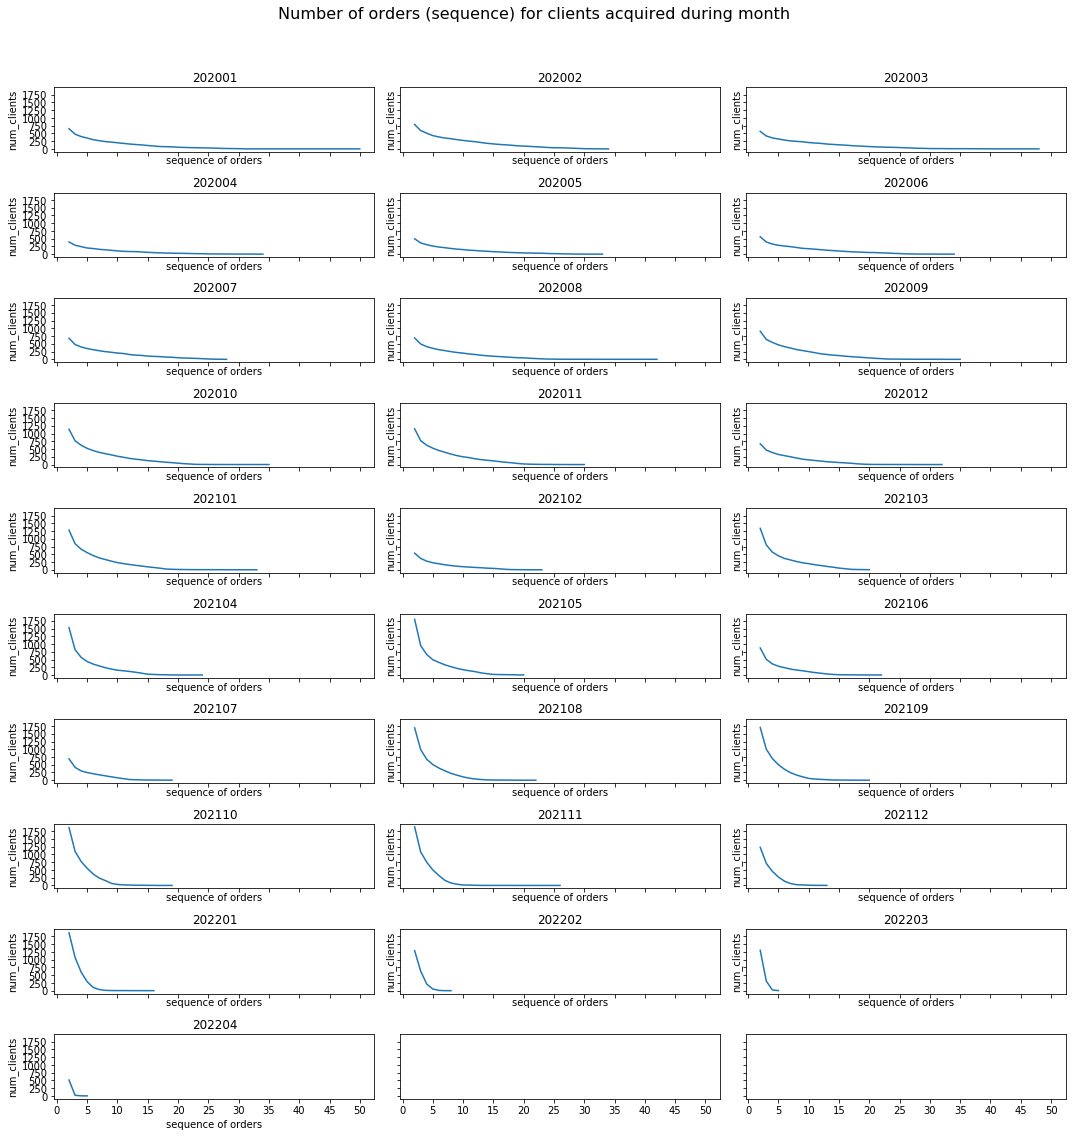

In [28]:
tmp=df_o.loc[(df_o['ORDER_TYPE']=='SUBSCRIPTION')].copy()
tmp=pd.merge(tmp, df_c[[cid, 'TRIAL_WEEK_ym']], on=cid, how='left')
tmptmp=tmp.groupby(['TRIAL_WEEK_ym','ORDER_SEQUENCE']).agg('size').reset_index()
tmptmp.rename(columns={0:'num_orders'}, inplace=True)
tmptmp['TRIAL_WEEK_ym_seq']=tmptmp.apply(lambda x: f"{x['TRIAL_WEEK_ym']}_{x['ORDER_SEQUENCE']}", axis=1)


m=tmptmp['TRIAL_WEEK_ym'].unique().tolist()
ym=tmptmp['num_orders'].max()



lm=len(m)
if lm%3==0:
    r=lm//3
else:
    r=lm//3+1
    
fig, axs = plt.subplots(r, 3, sharex='all', sharey='all',figsize=(15,15))
rr=0
cn=0
mm=tmp['ORDER_SEQUENCE'].max()
for c in m:    
    a=tmptmp.loc[tmptmp['TRIAL_WEEK_ym']==c].copy()
    axs[rr,cn].plot(a['ORDER_SEQUENCE'],a['num_orders'], label=c)
    axs[rr,cn].set_title(c)
    axs[rr,cn].xaxis.set_ticks(np.arange(0, mm+5, 5))
    axs[rr,cn].yaxis.set_ticks(np.arange(0, 2000, 250))
    axs[rr,cn].set_ylabel('num_clients', fontsize=10)
    axs[rr,cn].set_xlabel('sequence of orders', fontsize=10)
    
    cn+=1
    if cn==3:
        cn=0
        rr+=1
#plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=10)

fig.tight_layout()
fig.suptitle('Number of orders (sequence) for clients acquired during month ', y=1.05, fontsize=16)
plt.show()
plt.close()

In [29]:
# in PCNT
tmp=df_o.loc[df_o['ORDER_TYPE'].isin(['SUBSCRIPTION','TRIAL'])].copy()
tmp=pd.merge(tmp, df_c[[cid, 'TRIAL_WEEK_ym']], on=cid, how='left')
tmptmp=tmp.groupby(['TRIAL_WEEK_ym','ORDER_SEQUENCE']).agg('size').reset_index()
tmptmp.rename(columns={0:'num_orders'}, inplace=True)
tmptmp['TRIAL_WEEK_ym_seq']=tmptmp.apply(lambda x: f"{x['TRIAL_WEEK_ym']}_{x['ORDER_SEQUENCE']}", axis=1)
tmptmp['num_orders_prev']=tmptmp[['TRIAL_WEEK_ym','num_orders']].groupby('TRIAL_WEEK_ym').shift(1).astype('Int64')
tmptmp['num_orders_prev_change']=100*tmptmp['num_orders']/tmptmp['num_orders_prev']

tmptmp=tmptmp.loc[tmptmp['ORDER_SEQUENCE']>1].copy()

tmptmp.loc[tmptmp['TRIAL_WEEK_ym']=='202001'][['TRIAL_WEEK_ym','ORDER_SEQUENCE','num_orders','num_orders_prev','num_orders_prev_change']].head()

,TRIAL_WEEK_ym,ORDER_SEQUENCE,num_orders,num_orders_prev,num_orders_prev_change
1,202001,2,652,1696,38.4434
2,202001,3,475,652,72.8528
3,202001,4,400,475,84.2105
4,202001,5,350,400,87.5
5,202001,6,298,350,85.1429


Higher percentage means that there is better retention (less loss of clients).
From the previous table for users acquired from 2020_01 can be observed that there were 1696 orders with sequence 1 and only 38% proceeded to order 2.

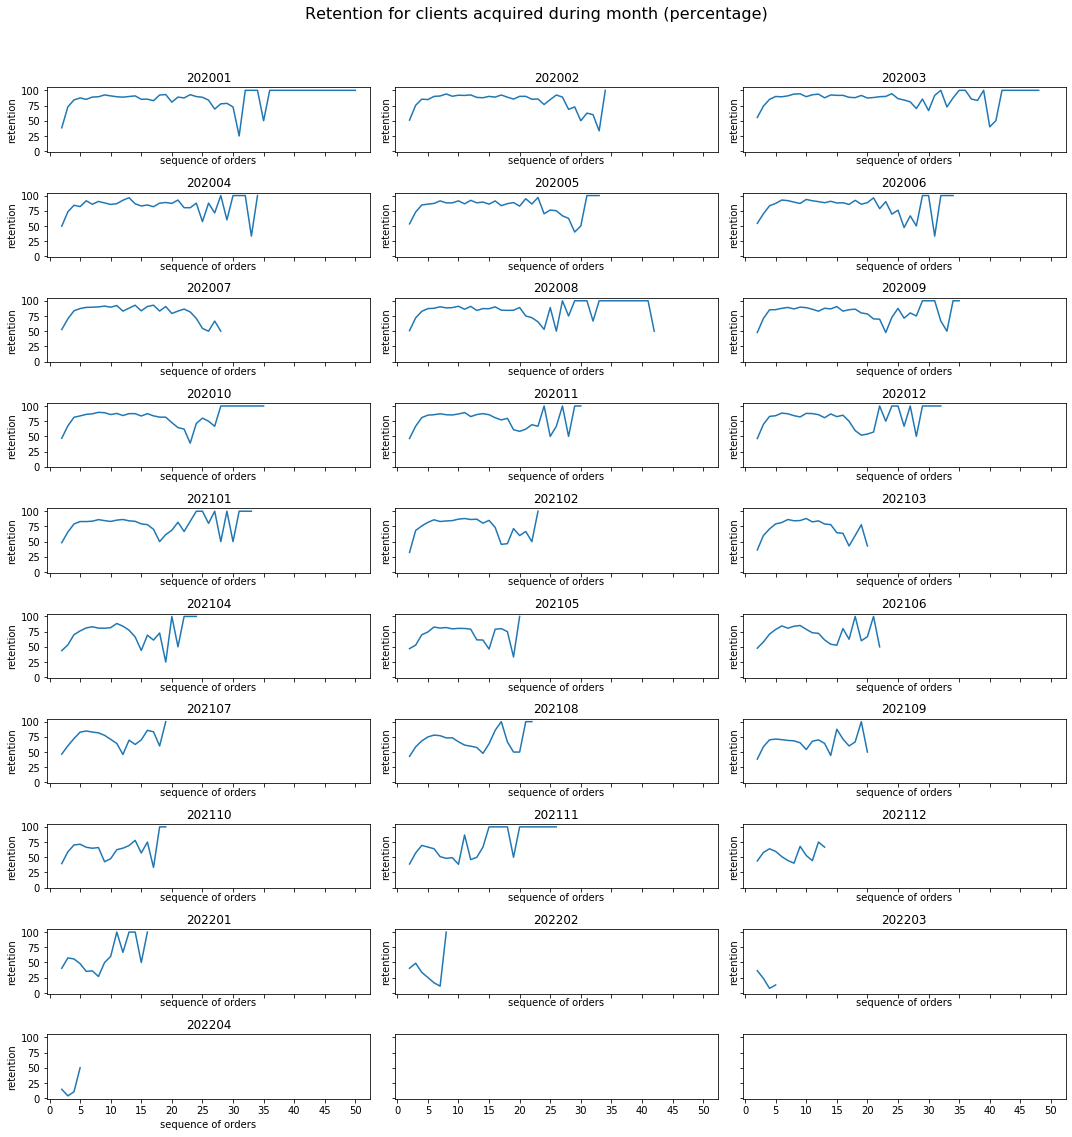

In [30]:
fig, axs = plt.subplots(r, 3, sharex='all', sharey='all',figsize=(15,15))
rr=0
cn=0
mm=tmp['ORDER_SEQUENCE'].max()
for c in m:    
    a=tmptmp.loc[(tmptmp['TRIAL_WEEK_ym']==c)].copy()
    axs[rr,cn].plot(a['ORDER_SEQUENCE'],a['num_orders_prev_change'], label=c)
    axs[rr,cn].set_title(c)
    axs[rr,cn].xaxis.set_ticks(np.arange(0, mm+5, 5))
    axs[rr,cn].yaxis.set_ticks(np.arange(0, 105, 25))
    axs[rr,cn].set_ylabel('retention', fontsize=10)
    axs[rr,cn].set_xlabel('sequence of orders', fontsize=10)
    cn+=1
    if cn==3:
        cn=0
        rr+=1
#plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=10)
fig.tight_layout()
fig.suptitle('Retention for clients acquired during month (percentage)', y=1.05, fontsize=16)
plt.show()
plt.close()

In [31]:
a=tmptmp.loc[tmptmp['ORDER_SEQUENCE']==2][['num_orders_prev_change']]
print(f"Average retention of clients after first order is {a['num_orders_prev_change'].mean():.2f}% (median: {a['num_orders_prev_change'].median():.2f}%)")

Average retention of clients after first order is 43.98% (median: 46.47%)


In [35]:
tmptmp.head()

,TRIAL_WEEK_ym,ORDER_SEQUENCE,num_orders,TRIAL_WEEK_ym_seq,num_orders_prev,num_orders_prev_change
1,202001,2,652,202001_2,1696,38.4434
2,202001,3,475,202001_3,652,72.8528
3,202001,4,400,202001_4,475,84.2105
4,202001,5,350,202001_5,400,87.5
5,202001,6,298,202001_6,350,85.1429


In [39]:
tmptmp['num_orders_prev_change']=tmptmp['num_orders_prev_change'].astype(float)

In [48]:
df_piv=pd.pivot_table(tmptmp,index=['TRIAL_WEEK_ym'], columns=['ORDER_SEQUENCE'],values=['num_orders_prev_change'])
df_piv.columns = df_piv.columns.get_level_values(1)
#df_piv

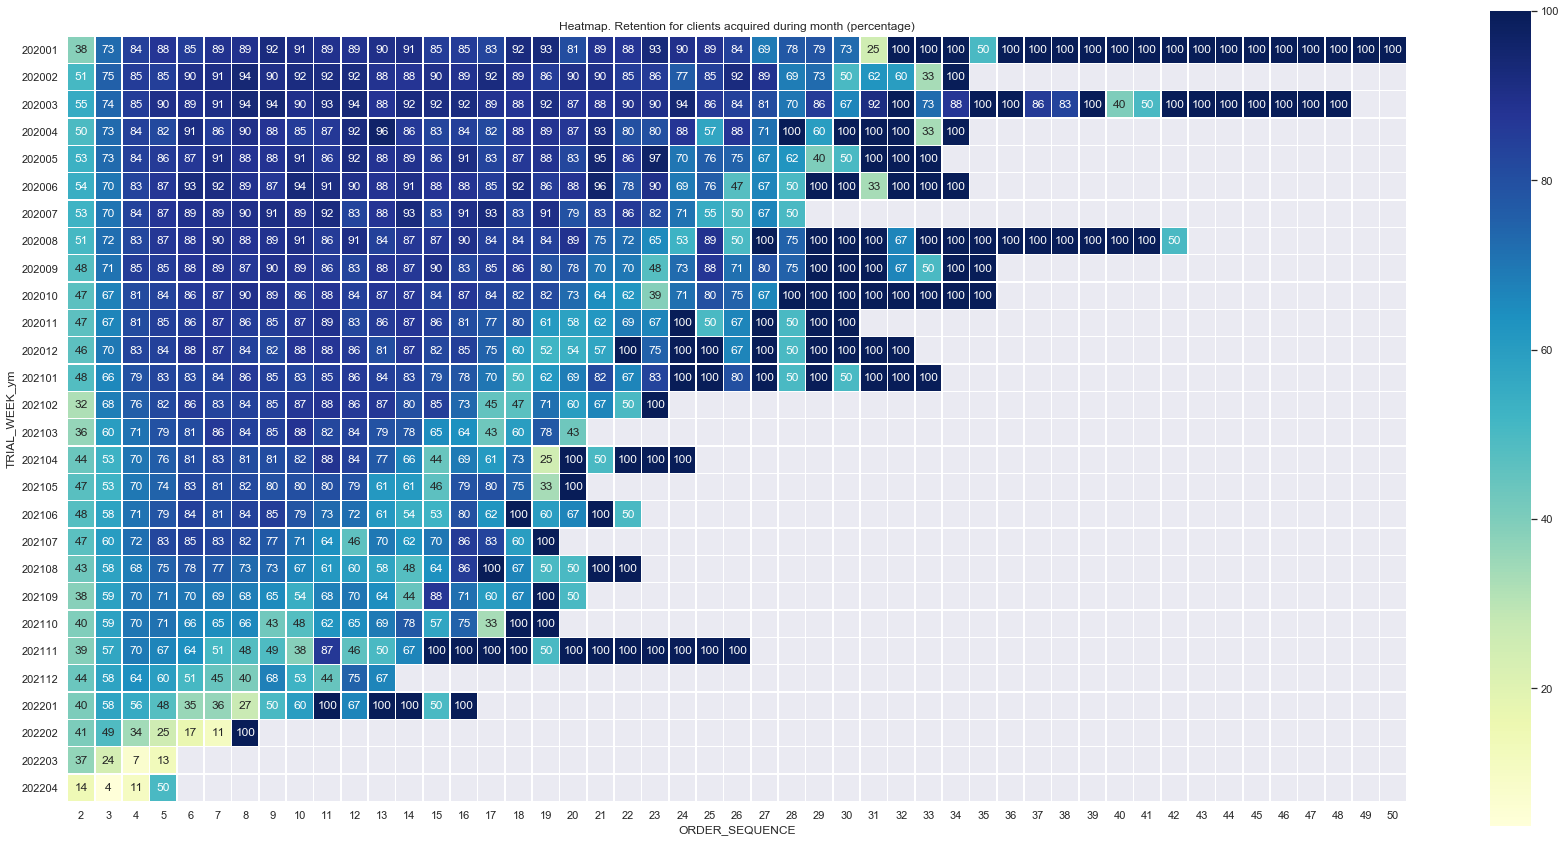

In [55]:
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(df_piv, annot=True, cmap="YlGnBu", linewidths=.5, ax=ax, cbar_kws={"shrink": 0.5}, square=True, fmt='.0f')
plt.title('Heatmap. Retention for clients acquired during month (percentage)')
plt.show()
plt.close()

In [ ]:
# How good is the convertion rate per cohort

a=tmptmp.loc[tmptmp['ORDER_SEQUENCE']==2].copy()
a=a.iloc[:-1] #will remove last month as it seems to be not matured
plt.plot(a['TRIAL_WEEK_ym'],a['num_orders_prev_change'])
t=[a['num_orders_prev_change'].mean()]*a.shape[0]
plt.plot(a['TRIAL_WEEK_ym'],t)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by degrees
# plt.legend()
plt.title("Convertion rate after Trial per cohort (mean for reference)")
plt.show()

print(f" Mean convertion rate {a['num_orders_prev_change'].mean():.2f} %")

In [ ]:
#performance by month (clients)

tmp=df_c.groupby(['TRIAL_WEEK_ym'])[cid].size().reset_index().copy()
tmp

In [ ]:
plt.title('Number of Clients by month (acquisition)')
plt.plot(tmp['TRIAL_WEEK_ym'],tmp[cid], label="Clients")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by degrees
plt.legend()
plt.grid(color='lightgrey', linestyle=':', linewidth=1)
plt.show()

## Financial insignts

In [ ]:
# What is GMV (revenue) and LTV (margin) per client?
tmp=df_o[[cid,'REVENUE', 'MARGIN']].groupby([cid]).sum().reset_index().copy()
tmp=tmp.sort_values('MARGIN')

print("-----------------------")
print('top 10 least profitable clients')
tmp.head(10)

In [ ]:
print("-----------------------")
print('top 10 most profitable clients')
tmp.tail(10)

### What share of all clients have porisitve LTV (margin)?

In [ ]:
#how many clients with positive / negative LTV margin?
num_pos=tmp.loc[tmp['MARGIN']>=0].shape[0]
print(f"{num_pos} clients create profit ({100*num_pos/len(customers):.2f} %)")

# total GMV, total Margin 
print(f"total\nGMV: {tmp['REVENUE'].sum():.2f} \nLVT: {tmp['MARGIN'].sum():.2f}")

In [ ]:
#total profit to total loss

In [ ]:
# what is result for those only on trial
tmptmp=tmp.loc[tmp[cid].isin(not_converted)].copy()
print(f"Total  (have only Trial) ~ cost of Trials \nGMV: {tmptmp['REVENUE'].sum():.2f} \nLVT: {tmptmp['MARGIN'].sum():.2f}")

In [ ]:
#orders by month, week
tmp=df_o.loc[(df_o['ORDER_TYPE']=='SUBSCRIPTION')].copy()
tmptmp=tmp.groupby(['ORDER_DATE_ym']).agg('size').reset_index()
tmptmp.rename(columns={0:'num_orders'}, inplace=True)

tmp=df_o.loc[(df_o['ORDER_TYPE']=='TRIAL')].copy()
tmptmp2=tmp.groupby(['ORDER_DATE_ym']).agg('size').reset_index()
tmptmp2.rename(columns={0:'num_trials'}, inplace=True)

plt.title('Number of orders by month')
plt.plot(tmptmp['ORDER_DATE_ym'],tmptmp['num_orders'], label="Orders")
plt.plot(tmptmp2['ORDER_DATE_ym'],tmptmp2['num_trials'], label="Trials")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by degrees
plt.legend()
plt.grid(color='lightgrey', linestyle=':', linewidth=1)
plt.show()

print("There can be lag between 1) marketing campaigns 2) trials (result of campaigns) and 3) next order (subscription after trial)")


In [ ]:
tmp=df_o.loc[(df_o['ORDER_TYPE']=='SUBSCRIPTION')].copy()
tmptmp=tmp.groupby(['ORDER_DATE_ym'])[['REVENUE','MARGIN']].sum().reset_index().copy()

#will remove last month as it is not complete
tmptmp=tmptmp[:-1]

plt.title('Financial results by month')
plt.plot(tmptmp['ORDER_DATE_ym'],tmptmp['MARGIN'], label="Margin")
plt.plot(tmptmp['ORDER_DATE_ym'],tmptmp['REVENUE'], label="Reveue")
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by degrees
plt.grid(color='lightgrey', linestyle=':', linewidth=1)
plt.legend()
plt.show()